In [0]:
import numpy as np
from matplotlib import pyplot as plt

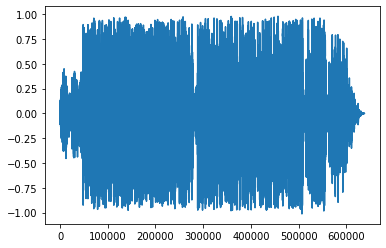

In [18]:
import os
#import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/Sample_BeeMoved_96kHz24bit.flac"
#audio_clips = os.listdir(audio_fpath)
#print("No. of .wav files in audio folder = ",len(audio_clips))
x, sr = librosa.load('/Sample_BeeMoved_96kHz24bit.flac', sr = 16000)
plt.plot(x)

<class 'numpy.ndarray'> <class 'int'>
(638016,) 16000


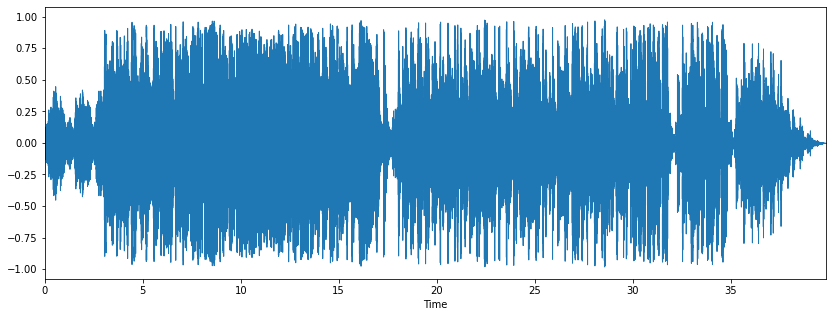

In [19]:
print(type(x), type(sr))
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)



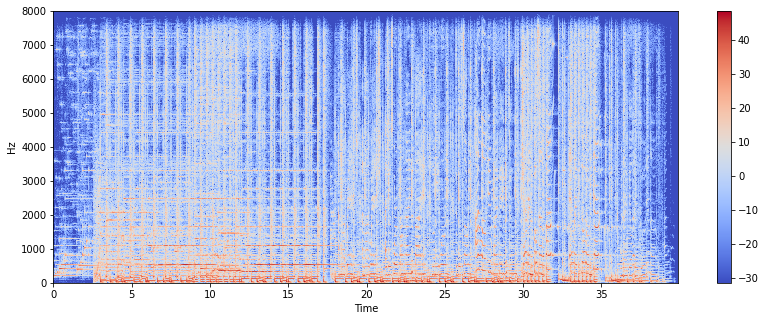

In [20]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

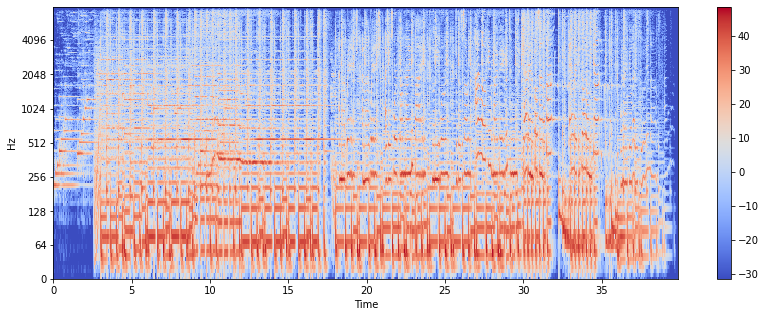

In [21]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:
def gen_audio(augmented_data, sr):
    sf.write("/Sample_BeeMoved_96kHz24bit.flac", aug_data, sr)
    plot_gen("/Sample_BeeMoved_96kHz24bit.flac")


def manipulate(audio_fpath, noise_factor):
    noise = np.random.randn(len(audio_fpath))
    augmented_data = audio_fpath + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(audio_fpath[0]))
    return gen_audio(augmented_data, sr)

    manipulate(audio_fpath, 0.02)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(augmented_data, sr=sr)
    

In [0]:
def shift_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

    shift_time(audio_fpath, sr, 1, 'right')
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(augmented_data, sr=sr)


In [0]:
#import librosa
def pitching(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

    pitching(audio_fpath, sr, 0.5)
    #plt.figure(figsize=(14, 5))
    #librosa.display.waveplot(augmented_data, sr=sr)

In [0]:
def speed_change(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

    speed_change(audio_fpath, 0.4)
    #plt.figure(figsize=(14, 5))
    #librosa.display.waveplot(augmented_data, sr=sr)

In [0]:
#augmentation part above
#data_generator below

In [0]:
from __future__ import print_function, division, absolute_import
import numpy as np
from keras.preprocessing.image import Iterator
from scipy import linalg
from scipy.signal import resample
import keras.backend as K
import warnings
from scipy.ndimage.interpolation import shift
import threading
from keras.utils import to_categorical

In [39]:
!pip install pydub

In [0]:
!pip install td_utils

ERROR: Could not find a version that satisfies the requirement td_utils (from versions: none)
ERROR: No matching distribution found for td_utils


In [0]:
from pydub import AudioSegment
#import librosa
import random
import sys
import io
import os
import glob
import IPython
#from td_utils import *
%matplotlib inline

In [0]:
class NumpyArrayIterator(Iterator):
    """Iterator yielding data from a Numpy array.
    # Arguments
        x: Numpy array of input data.
        y: Numpy array of targets data.
        audio_data_generator: Instance of `AudioDataGenerator`
            to use for random transformations and normalization.
        batch_size: Integer, size of a batch.
        shuffle: Boolean, whether to shuffle the data between epochs.
        seed: Random seed for data shuffling.
        data_format: String, one of `channels_first`, `channels_last`.
        save_to_dir: Optional directory where to save the audio
            being yielded, in a viewable format. This is useful
            for visualizing the random transformations being
            applied, for debugging purposes.
        save_prefix: String prefix to use for saving sample
            audio (if `save_to_dir` is set).
        save_format: Format to use for saving sample audio
            (if `save_to_dir` is set).
        subset: Subset of data (`"training"` or `"validation"`) if
            validation_split is set in AudioDataGenerator.
    """

    def __init__(self, x, y, audio_data_generator,
                 batch_size=32, shuffle=False, seed=None,
                 data_format=None,
                 save_to_dir=None, save_prefix='', save_format='wav',
                 subset=None):
        if y is not None and len(x) != len(y):
            raise ValueError('`x` (audio tensor) and `y` (labels) '
                             'should have the same length. '
                             'Found: x.shape = %s, y.shape = %s' %
                             (np.asarray(x).shape, np.asarray(y).shape))
        if subset is not None:
            if subset not in {'training', 'validation'}:
                raise ValueError('Invalid subset name:', subset,
                                 '; expected "training" or "validation".')
            split_idx = int(len(x) * audio_data_generator._validation_split)
            if subset == 'validation':
                x = x[:split_idx]
                if y is not None:
                    y = y[:split_idx]
            else:
                x = x[split_idx:]
                if y is not None:
                    y = y[split_idx:]
        if data_format is None:
            data_format = 'channels_last'
        self.x = np.asarray(x, dtype=K.floatx())
        if self.x.ndim != 3:
            raise ValueError('Input data in `NumpyArrayIterator` '
                             'should have rank 3. You passed an array '
                             'with shape', self.x.shape)
        channels_axis = 2 if data_format == 'channels_last' else 1
        if self.x.shape[channels_axis] not in {1, 3, 4}:
            warnings.warn('NumpyArrayIterator is set to use the '
                          'data format convention "' + data_format + '" '
                          '(channels on axis ' + str(channels_axis) + '), i.e. expected '
                          'either 1, 3 or 4 channels on axis ' + str(channels_axis) + '. '
                          'However, it was passed an array with shape ' + str(self.x.shape) +
                          ' (' + str(self.x.shape[channels_axis]) + ' channels).')
        if y is not None:
            self.y = np.asarray(y)
        else:
            self.y = None
        self.audio_data_generator = audio_data_generator
        self.data_format = data_format
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format
        super(NumpyArrayIterator, self).__init__(x.shape[0], batch_size, shuffle, seed)

    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = np.zeros(tuple([len(index_array)] + list(self.x.shape)[1:]),
                           dtype=K.floatx())
        for i, j in enumerate(index_array):
            x = self.x[j]
            x = self.audio_data_generator.random_transform(x.astype(K.floatx()))
            x = self.audio_data_generator.standardize(x)
            batch_x[i] = x
        if self.save_to_dir:
            raise NotImplementedError

        if self.y is None:
            return batch_x
        batch_y = self.y[index_array]
        return batch_x, batch_y

    def next(self):
        """For python 2.x.
        # Returns
            The next batch.
        """
        # Keeps under lock only the mechanism which advances
        # the indexing of each batch.
        with self.lock:
            index_array = next(self.index_generator)
        # The transformation of audio is not under thread lock
        # so it can be done in parallel
        return self._get_batches_of_transformed_samples(index_array)

class AudioDataGenerator(object):
    """Generate batches of tensor audio data with real-time data augmentation.
     The data will be looped over (in batches).
    # Arguments
        featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
        samplewise_center: Boolean. Set each sample mean to 0.
        featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
        samplewise_std_normalization: Boolean. Divide each input by its std.
        zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
        zca_whitening: Boolean. Apply ZCA whitening.
        roll_range: Float (fraction of total sample length). Range horizontal circular shifts.
        horizontal_flip: Boolean. Randomly flip inputs horizontally.
        zoom_range: Float (fraction of zoom) or [lower, upper]. 
        noise:  [mean,std,'Normal'] or [lower,upper,'Uniform']
                Add Random Additive noise. Noise is added to the data with a .5 probability.
        noiseSNR: Float required SNR in dB. Noise is added to the data with a .5 probability(NotImplemented)
        shift: Float (fraction of total sample). Range of horizontal shifts
        fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}.  Default is 'nearest'.
        Points outside the boundaries of the input are filled according to the given mode:
            'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
            'nearest':  aaaaaaaa|abcd|dddddddd
            'reflect':  abcddcba|abcd|dcbaabcd
            'wrap':  abcdabcd|abcd|abcdabcd
        cval: Float or Int. Value used for points outside the boundaries when `fill_mode = "constant"`.
        rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied,
                otherwise we multiply the data by the value provided (before applying
                any other transformation).
        preprocessing_function: function that will be implied on each input.
                The function will run after the audio is augmented.
                The function should take one argument:
                one audio (Numpy tensor with rank 2),
                and should output a Numpy tensor with the same shape.
        brightness_range: Tuple or list of Float. Range for adding random gain to the audio.
                Doesn't have any effect if normalization is performed.
        data_format: One of {"channels_first", "channels_last"}. 
                "channels_last" mode means that the audio should have shape (samples, width, channels)
                "channels_first" mode means that the audio should have shape (samples, channels, width).
                If you never set it, then it will be "channels_last".
        validation_split: Float. Fraction of audio reserved for validation (strictly between 0 and 1).
   
    """

    def __init__(self,
                 featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 zca_epsilon=1e-6,
                 roll_range=0., 
                 brightness_range=None,
                 zoom_range=0.,
                 shift=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=False,
                 rescale=None,
                 preprocessing_function=None,
                 data_format=None,
                 noise=None,
                 validation_split=0.0):
        if data_format is None:
            data_format = 'channels_last'
        self.featurewise_center = featurewise_center
        self.samplewise_center = samplewise_center
        self.featurewise_std_normalization = featurewise_std_normalization
        self.samplewise_std_normalization = samplewise_std_normalization
        self.zca_whitening = zca_whitening
        self.zca_epsilon = zca_epsilon
        self.roll_range = roll_range
        self.brightness_range = brightness_range
        self.zoom_range = zoom_range
        self.horizontal_flip = horizontal_flip
        self.rescale = rescale
        self.preprocessing_function = preprocessing_function
        self.fill_mode = fill_mode
        self.cval=cval
        self.shift=shift
        self.noise = noise
        
        if data_format not in {'channels_last', 'channels_first'}:
            raise ValueError('`data_format` should be `"channels_last"` (channel after row and '
                             'column) or `"channels_first"` (channel before row and column). '
                             'Received arg: ', data_format)
        self.data_format = data_format
        if data_format == 'channels_first':
            self.channel_axis = 1
            self.row_axis = 2
        if data_format == 'channels_last':
            self.channel_axis = 2
            self.row_axis = 1
        if validation_split and not 0 < validation_split < 1:
            raise ValueError('`validation_split` must be strictly between 0 and 1. '
                             ' Received arg: ', validation_split)
        self._validation_split = validation_split

        self.mean = None
        self.std = None
        self.principal_components = None
            
        if np.isscalar(zoom_range):
            self.zoom_range = [1 - zoom_range, 1 + zoom_range]
        elif len(zoom_range) == 2:
            self.zoom_range = [zoom_range[0], zoom_range[1]]
        else:
            raise ValueError('`zoom_range` should be a float or '
                             'a tuple or list of two floats. '
                             'Received arg: ', zoom_range)
        if zca_whitening:
            if not featurewise_center:
                self.featurewise_center = True
                warnings.warn('This AudioDataGenerator specifies '
                              '`zca_whitening`, which overrides '
                              'setting of `featurewise_center`.')
            if featurewise_std_normalization:
                self.featurewise_std_normalization = False
                warnings.warn('This AudioDataGenerator specifies '
                              '`zca_whitening` '
                              'which overrides setting of'
                              '`featurewise_std_normalization`.')
        if featurewise_std_normalization:
            if not featurewise_center:
                self.featurewise_center = True
                warnings.warn('This AudioDataGenerator specifies '
                              '`featurewise_std_normalization`, '
                              'which overrides setting of '
                              '`featurewise_center`.')
        if samplewise_std_normalization:
            if not samplewise_center:
                self.samplewise_center = True
                warnings.warn('This AudioDataGenerator specifies '
                              '`samplewise_std_normalization`, '
                              'which overrides setting of '
                              '`samplewise_center`.')
        if noise:
            if len(noise) != 3:
                raise ValueError('`noise` should be a list of format'
                                 '[mean,std,`Normal`] or [lower,upper,`Uniform`]'
                                 'Received arg: ', noise)
            if noise[-1] not in {'Uniform','Normal'}:
                raise ValueError('Distribution not recognised',noise[-1])
            

    def flow(self, x, y=None, batch_size=32, shuffle=True, seed=None,
             save_to_dir=None, save_prefix='', subset=None):
        """Takes numpy data & label arrays, and generates batches of
            augmented/normalized data.
        # Arguments
               x: data. Should have rank 3.
               y: labels.
               batch_size: int (default: 32).
               shuffle: boolean (default: True).
               seed: int (default: None).
               save_to_dir: None or str (default: None).
                This allows you to optionally specify a directory
                to which to save the augmented audio being generated
        # Returns
            An Iterator yielding tuples of `(x, y)` where `x` is a numpy array of data and
             `y` is a numpy array of corresponding labels."""
        if self.noise:
            shuffle=True
            warnings.warn('This AudioDataGenerator specifies '
                          '`noise`, which overrides the setting of'
                          '`shuffle` as True'
                         )
        return NumpyArrayIterator(
            x, y, self,
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            data_format=self.data_format,
            save_to_dir=save_to_dir,
            save_prefix=save_prefix,
            subset=subset)

    def flow_from_directory(self, directory,
                            target_size=(256, 256), color_mode='rgb',
                            classes=None, class_mode='categorical',
                            batch_size=32, shuffle=True, seed=None,
                            save_to_dir=None,
                            save_prefix='',
                            save_format='png',
                            follow_links=False,
                            subset=None,
                            interpolation='nearest'):

        raise NotImplementedError

    def standardize(self, x):
        """Apply the normalization configuration to a batch of inputs.
        # Arguments
            x: batch of inputs to be normalized.
        # Returns
            The inputs, normalized.
        """
        if self.preprocessing_function:
            x = self.preprocessing_function(x)
        if self.rescale:
            x *= self.rescale
        if self.samplewise_center:
            x -= np.mean(x, keepdims=True)
        if self.samplewise_std_normalization:
            x /= (np.std(x, keepdims=True) + K.epsilon())

        if self.featurewise_center:
            if self.mean is not None:
                x -= self.mean
            else:
                warnings.warn('This AudioDataGenerator specifies '
                              '`featurewise_center`, but it hasn\'t '
                              'been fit on any training data. Fit it '
                              'first by calling `.fit(numpy_data)`.')
        if self.featurewise_std_normalization:
            if self.std is not None:
                x /= (self.std + K.epsilon())
            else:
                warnings.warn('This AudioDataGenerator specifies '
                              '`featurewise_std_normalization`, but it hasn\'t '
                              'been fit on any training data. Fit it '
                              'first by calling `.fit(numpy_data)`.')
        if self.zca_whitening:
            if self.principal_components is not None:
                flatx = np.reshape(x, (-1, np.prod(x.shape[-2:])))
                whitex = np.dot(flatx, self.principal_components)
                x = np.reshape(whitex, x.shape)
            else:
                warnings.warn('This AudioDataGenerator specifies '
                              '`zca_whitening`, but it hasn\'t '
                              'been fit on any training data. Fit it '
                              'first by calling `.fit(numpy_data)`.')
        return x

    def random_transform(self, x, seed=None):
        """Randomly augment a single tensor.
        # Arguments
            x: 2D tensor.
            seed: random seed.
        # Returns
            A randomly transformed version of the input (same shape).
        """
        # x is a single audio
        data_row_axis = self.row_axis - 1
        data_channel_axis = self.channel_axis - 1

        if seed is not None:
            np.random.seed(seed)
            
        if not (self.zoom_range[0] == 1 and self.zoom_range[1] == 1):
            zx = np.random.uniform(self.zoom_range[0], self.zoom_range[1])
            input_length = x.shape[data_row_axis]
            x = resample(x, num=int(zx*x.shape[data_row_axis]), axis=data_row_axis)
            if x.shape[data_row_axis] >= input_length:
                x = x[:input_length]
            else:
                x = np.pad(x, ((0, input_length-x.shape[data_row_axis]),(0,0)),
                           'constant',constant_values=(0,np.mean(x)))
        
        if shift:
            hx = np.random.uniform(-self.shift,self.shift)
            x = shift(x , (int(hx*x.shape[data_row_axis]),0), mode=self.fill_mode, cval=self.cval)
            

        if self.roll_range:
            tx = np.random.uniform(-self.roll_range, self.roll_range)
            if self.roll_range < 1:
                tx *= x.shape[data_row_axis]
            x = np.roll(x, int(tx), axis=(data_row_axis))        
        
        if self.horizontal_flip:
            if np.random.random() < 0.5:
                x = np.flip(x,axis=data_row_axis)
                
        if (self.noise):
            if np.random.random() < 0.5:
                if self.noise[-1]=='Uniform':
                    x = x + np.random.uniform(self.noise[0],self.noise[1],size=x.shape)
                elif self.noise[-1]=='Normal':
                    x = x + np.random.normal(self.noise[0],self.noise[1],size=x.shape)
        
        if self.brightness_range is not None:
            x = random_brightness(x, self.brightness_range)
            
        return x

    def fit(self, x,
            augment=False,
            rounds=1,
            seed=None):
        """Compute the internal data stats related to the data-dependent transformations, based on an array of sample data.
        Only required if featurewise_center or featurewise_std_normalization or zca_whitening.
        # Arguments
            x: sample data.
            augment: Boolean (default: False). Whether to fit on randomly augmented samples.
            rounds: int (default: 1). If augment, how many augmentation passes over the data to use.
            seed: int (default: None). Random seed.
       """
        x = np.asarray(x, dtype=K.floatx())
        if x.ndim != 3:
            raise ValueError('Input to `.fit()` should have rank 3. '
                             'Got array with shape: ' + str(x.shape))
        if x.shape[self.channel_axis] not in {1, 3, 4}:
            warnings.warn(
                'Expected input to be tensor (as Numpy array) '
                'following the data format convention "' + self.data_format + '" '
                '(channels on axis ' + str(self.channel_axis) + '), i.e. expected '
                'either 1, 3 or 4 channels on axis ' + str(self.channel_axis) + '. '
                'However, it was passed an array with shape ' + str(x.shape) +
                ' (' + str(x.shape[self.channel_axis]) + ' channels).')

        if seed is not None:
            np.random.seed(seed)

        x = np.copy(x)
        if augment:
            raise NotImplementedError
            
        if self.featurewise_center:
            self.mean = np.mean(x, axis=(0, self.row_axis))
            broadcast_shape = [1, 1]
            broadcast_shape[self.channel_axis - 1] = x.shape[self.channel_axis]
            self.mean = np.reshape(self.mean, broadcast_shape)
            x -= self.mean

        if self.featurewise_std_normalization:
            self.std = np.std(x, axis=(0, self.row_axis))
            broadcast_shape = [1, 1]
            broadcast_shape[self.channel_axis - 1] = x.shape[self.channel_axis]
            self.std = np.reshape(self.std, broadcast_shape)
            x /= (self.std + K.epsilon())


        if self.zca_whitening:
            flat_x = np.reshape(x, (x.shape[0], x.shape[1] * x.shape[2]))
            sigma = np.dot(flat_x.T, flat_x) / flat_x.shape[0]
            u, s, _ = linalg.svd(sigma)
            s_inv = 1. / np.sqrt(s[np.newaxis] + self.zca_epsilon)
            self.principal_components = (u * s_inv).dot(u.T)


def random_brightness(x, brightness_range):
    """Perform a random brightness shift.
    # Arguments
        x: Input tensor. Must be 2D.
        brightness_range: Tuple of floats; brightness range.
    # Returns
        Numpy audio tensor.
    # Raises
        ValueError if `brightness_range` isn't a tuple.
    """
    if len(brightness_range) != 2:
        raise ValueError('`brightness_range should be tuple or list of two floats. '
                         'Received arg: ', brightness_range)

    u = np.random.uniform(brightness_range[0], brightness_range[1])
    x = u*x
    
    return x

class _Iterator(object):
    """Abstract base class for image data iterators.
    # Arguments
        n: Integer, total number of samples in the dataset to loop over.
        batch_size: Integer, size of a batch.
        shuffle: Boolean, whether to shuffle the data between epochs.
        seed: Random seeding for data shuffling.
    """

    def __init__(self, n, target_label, batch_size, shuffle, seed): # add target y to init(s)

        self.target_label=target_label
        self.n = n
        self.shuffle = shuffle
        self.batch_index = 0
        self.total_batches_seen = 0
        self.lock = threading.Lock()
        self.index_generator = self._flow_index(batch_size, shuffle=shuffle, seed=seed)
        self.current_idx = [0] * len(np.unique(self.y[self.target_label]))
        self.exhaustion = [False] * len(np.unique(self.y[self.target_label]))
        self.labels = np.unique(self.y[self.target_label])  # unique labels in y[target_label]
        self.chunk_size = int(batch_size / len(self.labels))
        print('Chunk size selected as %d' % self.chunk_size)
        if not all(np.bincount(self.y[self.target_label])>=self.chunk_size):
            warnings.warn('Number of samples for label %s is smaller than chunk size %d' %
                          (str(self.labels[np.bincount(self.y[self.target_label])
                                           <self.chunk_size]),self.chunk_size))

    def reset(self):
        self.batch_index = 0
        self.exhaustion = [False] * len(np.unique(self.y[self.target_label]))
        self.current_idx = [0] * len(np.unique(self.y[self.target_label]))


    def _flow_index(self, batch_size=32, shuffle=False, seed=None):
        # Ensure self.batch_index is 0.
        self.reset()
        while 1:
            if seed is not None:
                np.random.seed(seed + self.total_batches_seen)

            if self.batch_index == 0:
                label_idx = []
                for idx,each in enumerate(self.labels):
                    label_idx.append(np.hstack(np.where(self.y[self.target_label] == each)))
                    if shuffle:
                        label_idx[idx] = np.random.permutation(label_idx[idx]) # permute for first batch
                label_count = [len(each) for each in label_idx]
                # #print(label_count)

            index_array = []
            for idx,num in enumerate(label_count):
                # #print(self.current_idx)
                if (num - self.current_idx[idx]) >= self.chunk_size: ## if there is space in the current label
                    index_array = index_array + list(label_idx[idx][self.current_idx[idx]:self.current_idx[idx]+self.chunk_size])
                    self.current_idx[idx] += self.chunk_size
                ## include remaining samples
                else:
                    self.exhaustion[idx] = True
                    self.current_idx[idx] = 0
                    label_idx[idx] = np.random.permutation(label_idx[idx])
                    index_array = index_array + list(label_idx[idx][self.current_idx[idx]:self.current_idx[idx]+self.chunk_size])
                    self.current_idx[idx] += self.chunk_size

            self.total_batches_seen += 1
            if all(self.exhaustion):
                self.reset()
            else:
                self.batch_index += 1
            #print("Total batches seen %d" % self.total_batches_seen)
            #print("Batch Index %d" % self.batch_index)
            #print("Current Index %s" % str(self.current_idx))
            yield index_array

    def __iter__(self):
        # Needed if we want to do something like:
        # for x, y in data_gen.flow(...):
        return self

    def __next__(self, *args, **kwargs):
        return self.next(*args, **kwargs)


class _NumpyArrayIterator(_Iterator):
    """Iterator yielding data from a Numpy array.
    # Arguments
        x: Numpy array of input data.
        y: Numpy array of targets data.
        audio_data_generator: Instance of `AudioDataGenerator`
            to use for random transformations and normalization.
        batch_size: Integer, size of a batch.
        shuffle: Boolean, whether to shuffle the data between epochs.
        seed: Random seed for data shuffling.
        data_format: String, one of `channels_first`, `channels_last`.
        save_to_dir: Optional directory where to save the audio
            being yielded, in a viewable format. This is useful
            for visualizing the random transformations being
            applied, for debugging purposes.
        save_prefix: String prefix to use for saving sample
            audio (if `save_to_dir` is set).
        save_format: Format to use for saving sample audio
            (if `save_to_dir` is set).
        subset: Subset of data (`"training"` or `"validation"`) if
            validation_split is set in AudioDataGenerator.
    """

    def __init__(self, x, y, target_label, flag, audio_data_generator,
                 batch_size=32, shuffle=False, seed=None,
                 data_format=None,
                 save_to_dir=None, save_prefix='', save_format='png',
                 subset=None):

        if subset is not None:
            if subset not in {'training', 'validation'}:
                raise ValueError('Invalid subset name:', subset,
                                 '; expected "training" or "validation".')
            split_idx = int(len(x) * audio_data_generator._validation_split)
            if subset == 'validation':
                x = x[:split_idx]
                if y is not None:
                    for i in range(np.shape(y)[0]):
                        y[i] = y[i][:split_idx]
            else:
                x= x[split_idx:]
                if y is not None:
                    for i in range(np.shape(y)[0]):
                        y[i] = y[i][:split_idx]

        if data_format is None:
            data_format = 'channels_last'
        self.x = np.asarray(x, dtype=K.floatx())

        if self.x.ndim != 3:
            raise ValueError('Input data in `NumpyArrayIterator` '
                             'should have rank 3. You passed an array '
                             'with shape', self.x.shape)
        channels_axis = 2 if data_format == 'channels_last' else 1
        if self.x.shape[channels_axis] not in {1, 2, 3, 4}:
            warnings.warn('NumpyArrayIterator is set to use the '
                          'data format convention "' + data_format + '" '
                          '(channels on axis ' + str(channels_axis) + '), i.e. expected '
                          'either 1, 3 or 4 channels on axis ' + str(channels_axis) + '. '
                          'However, it was passed an array with shape ' + str(self.x.shape) +' (' + str(self.x.shape[channels_axis]) + ' channels).')

        self.flag = flag
        if y is not None:
            self.y = [np.asarray(each) for each in y]
            sizes_of_branches = [len(each) for each in y]  ## handle categorical/non-categorical labels in list of y
            sizes_of_branches += [len(x)]
            if len(np.unique(sizes_of_branches)) > 1:
                raise ValueError('Non coherent input shapes')
        else:
            self.y=y

        self.audio_data_generator = audio_data_generator
        self.data_format = data_format
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format
        super(_NumpyArrayIterator, self).__init__(x.shape[0], target_label, batch_size, shuffle, seed)


    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = np.zeros(tuple([len(index_array)] + list(self.x.shape)[1:]),
                           dtype=K.floatx())
        for i, j in enumerate(index_array):
            x = self.x[j]
            x = self.audio_data_generator.random_transform(x.astype(K.floatx()))
            x = self.audio_data_generator.standardize(x)
            batch_x[i] = x

        if self.save_to_dir:
            raise NotImplementedError

        if self.y is None:
            return batch_x

        batch_y = [each[index_array] for each in self.y]

        if self.flag==1:
            batch_y[self.target_label] = to_categorical(batch_y[self.target_label])
        if self.flag==2:
            print()
        if self.flag==3:
            print()

        if len(batch_y)==1:
            batch_y=batch_y[0]
        return batch_x, batch_y

    def next(self):
        """For python 2.x.
        # Returns
            The next batch.
        """
        # Keeps under lock only the mechanism which advances
        # the indexing of each batch.
        with self.lock:
            index_array = next(self.index_generator)
        # The transformation of images is not under thread lock
        # so it can be done in parallel
        return self._get_batches_of_transformed_samples(index_array)


class BalancedAudioDataGenerator(AudioDataGenerator):
    """Generate batches of tensor audio data with real-time data augmentation.
     The data will be looped over (in batches).
    # Arguments
        featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
        samplewise_center: Boolean. Set each sample mean to 0.
        featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
        samplewise_std_normalization: Boolean. Divide each input by its std.
        zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
        zca_whitening: Boolean. Apply ZCA whitening.
        roll_range: Float (fraction of total sample length). Range horizontal circular shifts.
        horizontal_flip: Boolean. Randomly flip inputs horizontally.
        zoom_range: Float (fraction of zoom) or [lower, upper].
        noise:  [mean,std,'Normal'] or [lower,upper,'Uniform']
                Add Random Additive noise. Noise is added to the data with a .5 probability.
        noiseSNR: Float required SNR in dB. Noise is added to the data with a .5 probability(NotImplemented)
        shift: Float (fraction of total sample). Range of horizontal shifts
        fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}.  Default is 'nearest'.
        Points outside the boundaries of the input are filled according to the given mode:
            'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
            'nearest':  aaaaaaaa|abcd|dddddddd
            'reflect':  abcddcba|abcd|dcbaabcd
            'wrap':  abcdabcd|abcd|abcdabcd
        cval: Float or Int. Value used for points outside the boundaries when `fill_mode = "constant"`.
        rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied,
                otherwise we multiply the data by the value provided (before applying
                any other transformation).
        preprocessing_function: function that will be implied on each input.
                The function will run after the image is resized and augmented.
                The function should take one argument:
                one image (Numpy tensor with rank 3),
                and should output a Numpy tensor with the same shape.
        data_format: One of {"channels_first", "channels_last"}.
            "channels_last" mode means that the images should have shape `(samples, height, width, channels)`,
            "channels_first" mode means that the images should have shape `(samples, channels, height, width)`.
            It defaults to the `image_data_format` value found in your
            Keras config file at `~/.keras/keras.json`.
            If you never set it, then it will be "channels_last".
        validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
    """
    ### add target y labels to use for balancing
    ## consider issues if y is not list
    def __init__(self,
                 featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 zca_epsilon=1e-6,
                 roll_range=0.,
                 brightness_range=None,
                 zoom_range=0.,
                 shift=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=False,
                 rescale=None,
                 preprocessing_function=None,
                 data_format=None,
                 noise=None,
                 validation_split=0.0):

        super(BalancedAudioDataGenerator,self).__init__(featurewise_center=featurewise_center,
                 samplewise_center=samplewise_center,
                 featurewise_std_normalization=featurewise_std_normalization,
                 samplewise_std_normalization=samplewise_std_normalization,
                 zca_whitening=zca_whitening,
                 zca_epsilon=zca_epsilon,
                 roll_range=roll_range,
                 brightness_range=brightness_range,
                 zoom_range=zoom_range,
                 shift=shift,
                 fill_mode=fill_mode,
                 cval=cval,
                 horizontal_flip=horizontal_flip,
                 rescale=rescale,
                 preprocessing_function=preprocessing_function,
                 data_format=data_format,
                 noise=noise,
                 validation_split=validation_split)


    def flow(self, x, y=None, target_label=0, batch_size=32, shuffle=True, seed=None,
             save_to_dir=None, save_prefix='', save_format='png', subset=None):
        """Takes numpy data & label arrays, and generates batches of
            augmented/normalized data.
        # Arguments
               x: data. Should have rank 4.
                In case of grayscale data,
                the channels axis should have value 1, and in case
                of RGB data, it should have value 3.
               y: labels.
               batch_size: int (default: 32).
               shuffle: boolean (default: True).
               seed: int (default: None).
               save_to_dir: None or str (default: None).
                This allows you to optionally specify a directory
                to which to save the augmented samples being generated
                (useful for listening to what you are doing).
               save_prefix: str (default: `''`). Prefix to use for filenames of saved pictures
                (only relevant if `save_to_dir` is set).
                save_format: one of "png", "jpeg" (only relevant if `save_to_dir` is set). Default: "png".
        # Returns
            An Iterator yielding tuples of `(x, y)` where `x` is a numpy array of image data and
             `y` is a numpy array of corresponding labels."""
        y = y.copy()
        if self.noise:
            shuffle = True
            warnings.warn('This AudioDataGenerator specifies '
                          '`noise`, which overrides the setting of'
                          '`shuffle` as True'
                          )
        if y is None:
            raise ValueError('`y` must be specified for balanced data generation')
        ## handle if y is not a list
        if not type(y) == list and y is not None:
            y = [y]
        ## handle y type
        try:
            if (y[target_label].shape[1] > 1):
                flag = 1
                y[target_label] = np.argmax(y[target_label], axis=-1)
            else:
                flag = 2
                y[target_label] = np.argmax(y[target_label], axis=-1)
        except:
            flag = 3

    # everything is of shape (n,)
        return _NumpyArrayIterator(
            x=x, y=y, target_label=target_label, flag=flag, audio_data_generator=self,
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            data_format=self.data_format,
            save_to_dir=save_to_dir,
            save_prefix=save_prefix,
            save_format=save_format,
            subset=subset)

In [42]:
from keras.models import Sequential
from my_classes import DataGenerator

ModuleNotFoundError: ignored

In [0]:
!pip install my_classes

ERROR: Could not find a version that satisfies the requirement my_classes (from versions: none)
ERROR: No matching distribution found for my_classes


In [43]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 123kB/s 


In [0]:
def preprocess_audio(filename):
    # Trim or pad audio segment to 10000ms
    padding = AudioSegment.silent(duration=10000)
    segment = AudioSegment.from_wav(filename)[:10000]
    segment = padding.overlay(segment)
    # Set frame rate to 44100
    segment = segment.set_frame_rate(44100)
    # Export as wav
    segment.export(filename, format='wav')

In [48]:
filename = "/activate (online-audio-converter.com).wav"

IPython.display.Audio("/activate (online-audio-converter.com).wav")

In [49]:
import speech_recognition as sr

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Audio file as source
# listening the audio file and store in audio_text variable

with sr.AudioFile('/activate (online-audio-converter.com).wav') as source:
    
    audio_text = r.listen(source)
    
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
     
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
hello
